## 6.1 Underfit
When a model bias towards simple predictions (for instance when it looks at a single column or feature) we say it has too much bias or it underfits. The simplicity results in the fact that it can't capture the underlying patterns in the data for it to be of any use.

An underfit model can be fixed ny making it more complex. We can add complexity by:
* Adding more features (columns) that have predictive value. This can be done by engineering new features from the existing data.
* Using a more complex model. For example, you might switch from a linear model to a decision tree or a neural network. You could also tune the hyper parameters of the model to increase its complexity.

In [2]:
from EffectiveXGBoost import *
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn.objects as so

In [5]:
path_url = 'https://github.com/mattharrison/datasets/raw/master/data/kaggle-survey-2018.zip'
file_name = 'kaggle-survey-2018.zip'
dataset = 'multipleChoiceResponses.csv'

survey_df = extract_dataset(path_url, file_name, dataset)
final_df = prep_data(survey_df)

pline = pipeline.Pipeline(
    [('tweak', PrepDataTransformer()),
    ('cat', encoding.OneHotEncoder(top_categories=5, drop_last=True,
    variables=['Q1', 'Q3', 'major'])),
    ('num_impute', imputation.MeanMedianImputer(imputation_method='median',
                variables=['education', 'years_exp']))]
    )

X, y = prepX_y(survey_df, 'Q6')

sur_X_train, sur_X_test, sur_y_train, sur_y_test = (model_selection
                                    .train_test_split(X, y, 
                                                      test_size=.3, 
                                                      random_state=42, 
                                                      stratify=y)
                                                        )

X_train = pline.fit_transform(sur_X_train, sur_y_train)
X_test = pline.transform(sur_X_test)

G:\My Drive\SisengAI\AlgorithmicTrading\code_rebuilding\MattHarrison\EffectiveXGBoost\EffectiveXGBoost.py:56: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  all_df = pd.read_csv(z.open(dataset))


In [6]:
stump_dt = tree.DecisionTreeClassifier(max_depth=1)
X_train = pline.fit_transform(sur_X_train)
stump_dt.fit(X_train, sur_y_train)

DecisionTreeClassifier(max_depth=1)

In [7]:
X_test = pline.transform(sur_X_test)
stump_dt.score(X_test, sur_y_test)

0.6243093922651933

We will redo the above with a different variable name to indicate what we have done. we call call it `under_fit`.

In [9]:
under_fit = tree.DecisionTreeClassifier(max_depth=1)
X_train = pline.fit_transform(sur_X_train)
under_fit.fit(X_train, sur_y_train)
under_fit.score(X_test, sur_y_test)

0.6243093922651933

## 6.2 Growing a Tree
To tackle the issue of underfitting, we could add more features (or columns) to the training data that better separate the classes or add complexity by letting the tree to grow larger. We will try and measure the accuracy of the model step by step as we are making the changes to see if what we are doing is bringing in any improvement in the model accuracy.

In machine learning, a scoring function is used to evaluate the performance of a model. Different models can have different scoring functions, and you can also create your own. For example, scikit-learn optimizes the Gini impurity measure when building decision trees, while XGBoost performs gradient descent on a loss function to optimize its model. The goal is to find the best model parameters that minimize the loss function or maximize the scoring function, subject to any constraints that may be imposed on the model. This process is called optimization.

Constraints refer to limitations or restrictions placed on the model parameters or the optimization process. These constraints can take various forms, such as bounds on the values of the model parameters or requirements that certain conditions be satisfied. Constraints can be used to incorporate prior knowledge about the problem or to ensure that the model behaves in a desired manner. For example, in a linear regression problem, you might impose a constraint that the coefficients of the model must be non-negative. This would ensure that the model only makes positive contributions to the prediction. 

Hyperparameters are parameters of the model that are not learned from the data but are set by the user before training. They control various aspects of the model and can be used to adjust its complexity. For example, in a tree-based model, hyperparameters can be used to control the depth of the tree, the minimum number of samples required to split a node, or the maximum number of leaf nodes. By adjusting these hyperparameters, you can control how and when the tree grows and add more complexity to the model if needed. This can help prevent underfitting, where the model is too simple to capture the underlying patterns in the data. 

## 6.3 Overfitting
This is when a model has too much variance making it complicated. The model seems to look into every nook and crany of the training data. The solution to this is:
* Simplify or constrain (regularize): to prune back the growth of the tree so that the leaf nodes are not overly specific. This simplifies or constrains the model and reduces its complexity.
* Add more samples (rows of data): With more data, the model has more opportunities to find the important features and patterns in the data, which can help it generalize better to new data.

To make an overfit model with a decision tree, we just let the model
grow until every node is pure (of the same class) by setting `max_depth=None` to overfit the tree (which is the default behavior of DecisionTreeClassifier).


In [10]:
over_fit = tree.DecisionTreeClassifier(max_depth=None)
X_train = pline.fit_transform(sur_X_train)
over_fit.fit(X_train, sur_y_train)
over_fit.score(X_test, sur_y_test)

0.6640883977900552

Let us visualize our tree model below

In [13]:
features = [c for c in X_train.columns]
print(features)

['age', 'education', 'years_exp', 'compensation', 'python', 'r', 'sql', 'Q1_Male', 'Q1_Female', 'Q1_Prefer not to say', 'Q1_Prefer to self-describe', 'Q3_United States of America', 'Q3_India', 'Q3_China', 'major_cs', 'major_other', 'major_eng', 'major_stat']


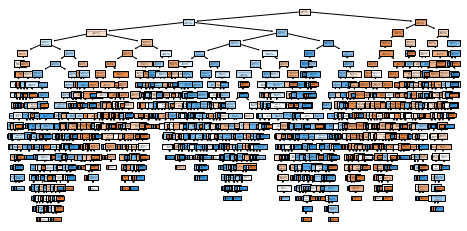

In [17]:
fig, ax = plt.subplots(figsize=(8, 4))
_=tree.plot_tree(over_fit, feature_names=features, filled=True)

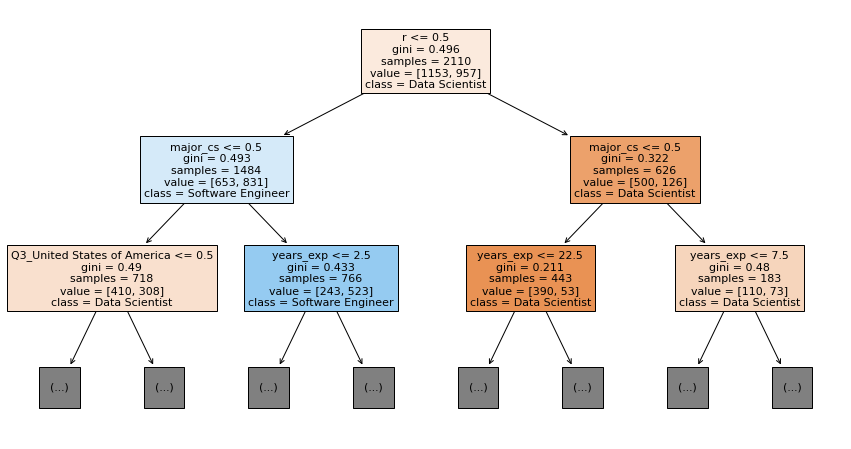

In [21]:
fig, ax = plt.subplots(figsize=(15, 8))
tree.plot_tree(over_fit, feature_names=features, 
               filled=True, class_names=over_fit.classes_,
               max_depth=2, fontsize=11);